In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pylab as pl

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score

import sklearn.metrics as metrics
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA 
from statsmodels.tsa.stattools import adfuller

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE

In [2]:
data = pd.read_csv("avocado.csv").drop(columns=["Unnamed: 0"])

In [3]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
print(f'Null в датасете:\n{data.isnull().sum()}\n')
print(f'NaN в датасете:\n {data.isna().sum()}\n')
print(f"Типы  в датасете:\n {data.dtypes}\n")

Null в датасете:
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

NaN в датасете:
 Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Типы  в датасете:
 Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object



Пропуски отсутствуют

In [5]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
sns.set_context("talk", font_scale=0.7)

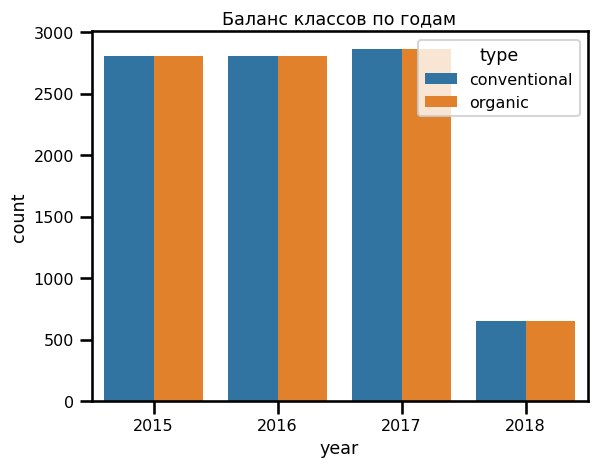

In [7]:
sns.countplot(x='year', hue='type', data=data)
plt.title('Баланс классов по годам')
plt.show()

Классы распределены равномерно, но в 2018 гораздо меньше наблюдений

<Axes: title={'center': 'Distribution Price'}, xlabel='AveragePrice', ylabel='Density'>

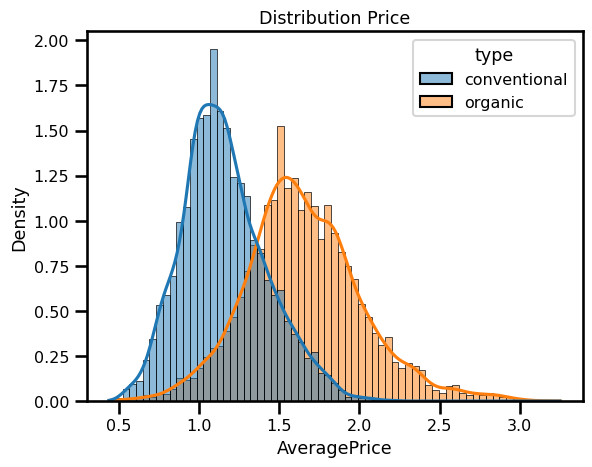

In [8]:
pl.title("Distribution Price")
sns.histplot(data=data, x="AveragePrice", hue="type", kde=True, stat="density", common_norm=False)

Видим что органические в среднем дороже, но оба распределения похожи на нормальные 

Посмотрим временные зависимости

In [9]:
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


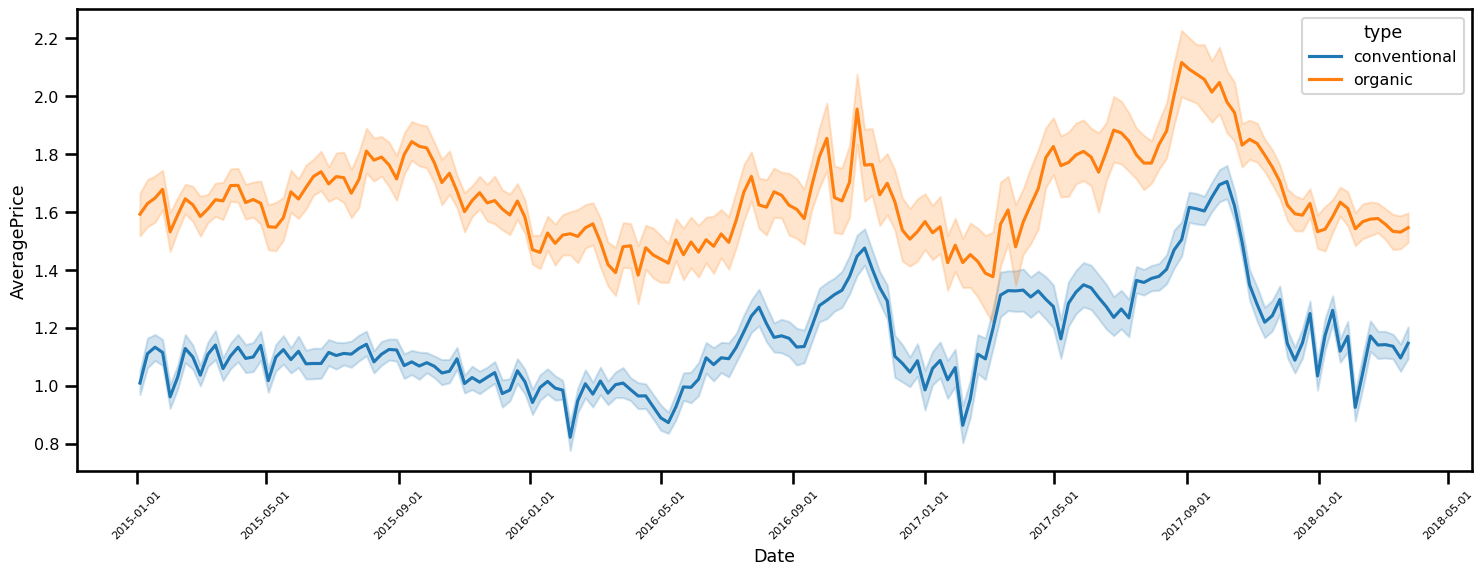

In [11]:
plt.figure(figsize=(18, 6))
ax = sns.lineplot(x='Date', y='AveragePrice', hue='type', data=data)
plt.xticks(rotation=45, fontsize=8)
xticks = ax.get_xticks()
ax.set_xticks(xticks[::1])

<Figure size 1000x1000 with 0 Axes>

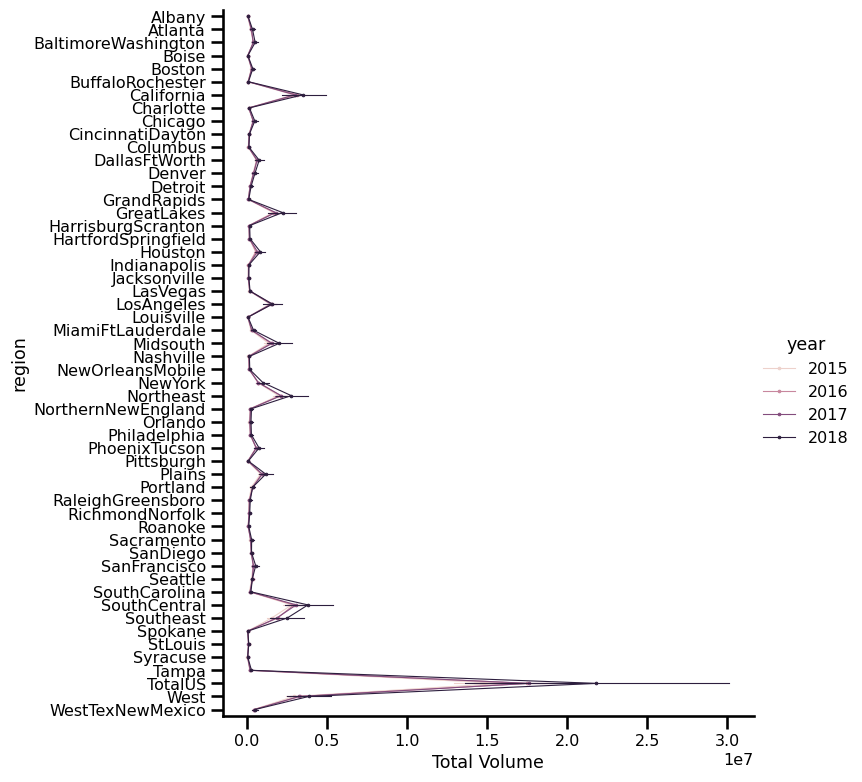

In [12]:
plt.figure(figsize=(10, 10))
sns.catplot(x='Total Volume', y='region', data=data, hue='year', height=8, kind='point', linewidth=0.8)

Различий по годам для регионов не наблюдается

Вытащим из даты месяц и день

In [13]:
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [14]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [15]:
continuous_columns = [key for key in data.keys() if data[key].dtype in ("int32", "int64", "float64")]
categorical_columns = [key for key in data.keys() if data[key].dtype == "object"]
print(f"Категориальные признаки: {categorical_columns}\nЧисленные признаки: {continuous_columns}")

Категориальные признаки: ['type', 'region']
Численные признаки: ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


Корреляция цены с численными признаками

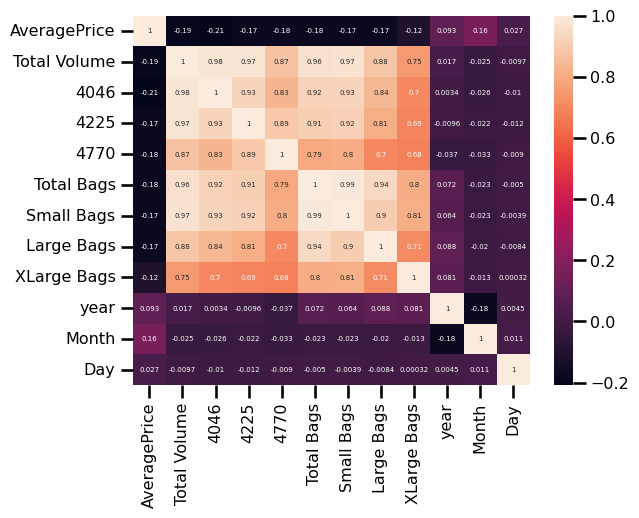

In [16]:
sns.heatmap(data[continuous_columns].corr(), annot=True, annot_kws = {'size':5})
plt.show()

Видим, что цена не сильно коррелирует с численными признаками. Но выделим Total Bags и Total Volume и Day.

Используем label encoding для категориальных признаков

In [17]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
dicts = {}
for column in categorical_columns:
    label.fit(data[column].drop_duplicates()) 
    dicts[column] = list(label.classes_)
    data[column] = label.transform(data[column]) 

In [18]:
dicts

{'type': ['conventional', 'organic'],
 'region': ['Albany',
  'Atlanta',
  'BaltimoreWashington',
  'Boise',
  'Boston',
  'BuffaloRochester',
  'California',
  'Charlotte',
  'Chicago',
  'CincinnatiDayton',
  'Columbus',
  'DallasFtWorth',
  'Denver',
  'Detroit',
  'GrandRapids',
  'GreatLakes',
  'HarrisburgScranton',
  'HartfordSpringfield',
  'Houston',
  'Indianapolis',
  'Jacksonville',
  'LasVegas',
  'LosAngeles',
  'Louisville',
  'MiamiFtLauderdale',
  'Midsouth',
  'Nashville',
  'NewOrleansMobile',
  'NewYork',
  'Northeast',
  'NorthernNewEngland',
  'Orlando',
  'Philadelphia',
  'PhoenixTucson',
  'Pittsburgh',
  'Plains',
  'Portland',
  'RaleighGreensboro',
  'RichmondNorfolk',
  'Roanoke',
  'Sacramento',
  'SanDiego',
  'SanFrancisco',
  'Seattle',
  'SouthCarolina',
  'SouthCentral',
  'Southeast',
  'Spokane',
  'StLouis',
  'Syracuse',
  'Tampa',
  'TotalUS',
  'West',
  'WestTexNewMexico']}

Корреляция цены с категориальными признаками

In [19]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


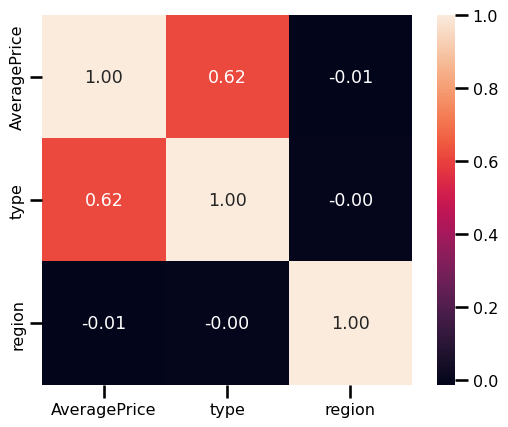

In [20]:
columns = ['AveragePrice'] + categorical_columns
cm = np.corrcoef(data[columns].values.T)
hm = sns.heatmap(cm,cbar = True, annot = True, square = True, fmt = '.2f', yticklabels = columns, xticklabels = columns)

Ожидаемо с типом корреляция наибольшая. Регион практически не влияет

Подготовка данных завершена

Применим линейную регрессию

In [21]:
import statsmodels.api as sm

X = data[['Total Volume', 'Total Bags', 'Day', 'type']]
y = data['AveragePrice']

# Добавление константы (intercept) к признакам
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

In [22]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     2830.
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        08:38:38   Log-Likelihood:                -4889.4
No. Observations:               18249   AIC:                             9789.
Df Residuals:                   18244   BIC:                             9828.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.1490      0.005    210.241   

По P-value видно, что все коэффициенты статистически значимы, т.к. все < 0.05

In [23]:
target_column = "AveragePrice"
X = data[data.columns.drop([target_column, 'Date'])]

In [24]:
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import StandardScaler

seed = 42
target_column = "AveragePrice"
np.random.seed(seed)

# scaler = StandardScaler()
# data_scaled = data.copy()
# data_scaled[continuous_columns] = scaler.fit_transform(data[continuous_columns])

test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    np.array(data[target_column]),
    test_size=test_size,
    random_state=seed)

print(f"Train : {X_train.shape} {Y_train.shape}")
print(f"Test : {X_test.shape} {Y_test.shape}")

Train : (14599, 13) (14599,)
Test : (3650, 13) (3650,)


In [25]:
Y_train

array([1.88, 0.81, 2.01, ..., 1.31, 1.13, 1.35], shape=(14599,))

Прологарифмируем цену, чтобы выразить ошибку в процентах 

In [26]:
Y_train_log = np.log(Y_train)
clf = LinearRegression()
scores = abs(cross_val_score(clf, X_train, Y_train_log, cv=10, scoring='neg_mean_absolute_error'))
print(f"r2: {cross_val_score(clf, X_train, Y_train_log, cv=10).mean()}")
print(f"Средняя абсолютная ошибка на кросс-валидации: {scores.mean()}")
#Test
clf.fit(X_train, Y_train_log)
Y_test_log = np.log(Y_test)
Y_pred = clf.predict(X_test)
mae = mean_absolute_error(Y_test_log, Y_pred)
r2 = r2_score(Y_test_log, Y_pred)
print(f"Средняя абсолютная ошибка на тесте: {mae}")
print(f"R² на тесте: {r2}")

r2: 0.4517245740558762
Средняя абсолютная ошибка на кросс-валидации: 0.16731673362534635
Средняя абсолютная ошибка на тесте: 0.16807136186830487
R² на тесте: 0.4447005043598189


Наиболее влиятельынй признак - тип. Ошибка линейной регрессии примерно 16%

Попробуем градиентный бустинг

In [27]:
gb_model = GradientBoostingRegressor()
boost_scores = abs(cross_val_score(gb_model, X_train, Y_train, cv=3, scoring='neg_mean_absolute_error'))
print(f"r2: {cross_val_score(gb_model, X_train, Y_train_log, cv=3).mean()}")
print(f"Средняя абсолютная ошибка на кросс-валидации: {boost_scores.mean()}")
#Test
gb_model.fit(X_train, Y_train_log)
Y_test_log = np.log(Y_test)
Y_pred = gb_model.predict(X_test)
mae = mean_absolute_error(Y_test_log, Y_pred)
r2 = r2_score(Y_test_log, Y_pred)
print(f"Средняя абсолютная ошибка на тесте: {mae}")
print(f"R² на тесте: {r2}")


r2: 0.762568337923423
Средняя абсолютная ошибка на кросс-валидации: 0.15159482924159454
Средняя абсолютная ошибка на тесте: 0.10922901070034423
R² на тесте: 0.7583097230282252


Попробуем подобрать параметры

In [ ]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

def cv(X, y, model, n_splits):
    kf = KFold(n_splits)

    rmse_arr = []
    r2_arr = []

    for train, test in tqdm(kf.split(X, y), total=n_splits):
        X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
        clf = model.fit(X_train, y_train)
        rmse = np.array([-root_mean_squared_error(y_test, p) for p in clf.staged_predict(X_test)])
        r2 = np.array([r2_score(y_test, p) for p in clf.staged_predict(X_test)])
        rmse_arr.append(rmse)
        r2_arr.append(r2)

    return np.array(rmse_arr), np.array(r2_arr)


def rf_cv(X, y, n_trees, depth):
    result = {}
    cv_scores = []
    oob_scores = []

    for d in tqdm(depth):
        clf = RandomForestRegressor(n_estimators=n_trees, max_depth=d, random_state=0, n_jobs=-1, oob_score=True)
        cv_score = cross_val_score(clf, X, y, cv=3, n_jobs=-1)
        clf.fit(X, y)
        cv_scores.append(cv_score.mean())
        oob_scores.append(clf.oob_score_)
    
    result[f'n={n_trees}_cv'] = cv_scores 
    result[f'n={n_trees}_oob'] = oob_scores 

    return result

d:\code\mlhw\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
depth = [d for d in range(1, 20, 5)]
rf_cv1 = rf_cv(X, y, 100, depth)

100%|██████████| 4/4 [01:15<00:00, 18.98s/it]


In [ ]:
rf_cv2 = rf_cv(X, y, 200, depth)

100%|██████████| 4/4 [02:13<00:00, 33.43s/it]


In [ ]:
rf_cv3 = rf_cv(X, y, 300, depth)

100%|██████████| 4/4 [03:32<00:00, 53.21s/it]


In [41]:
rf_cv1

{'n=100_cv': [np.float64(0.3830906991686958),
  np.float64(0.6851842797907876),
  np.float64(0.8417696165844708),
  np.float64(0.8681595968515438)],
 'n=100_oob': [0.38333542195223536,
  0.6825689098734109,
  0.8543966205949919,
  0.8858753149753982]}

In [45]:
rf_cv2

{'n=200_cv': [np.float64(0.3830960852366367),
  np.float64(0.6850480597252074),
  np.float64(0.8424974191620915),
  np.float64(0.8690563550209509)],
 'n=200_oob': [0.38333147737088125,
  0.6837855929560394,
  0.856843693470055,
  0.8887108047237146]}

In [46]:
rf_cv3

{'n=300_cv': [np.float64(0.38308554378776444),
  np.float64(0.6852275877618584),
  np.float64(0.842507213321106),
  np.float64(0.8690257321927124)],
 'n=300_oob': [0.3833238914480184,
  0.6841399312827632,
  0.8571105137072179,
  0.8891482476489441]}

Text(0.5, 0, 'Глубина деревьев')

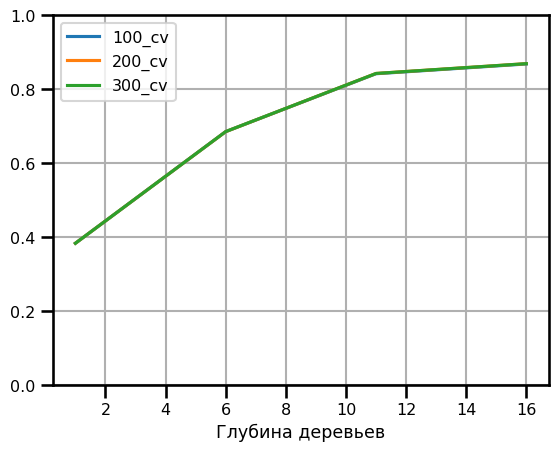

In [44]:
plt.plot(depth, rf_cv1['n=100_cv'], label='100_cv')
plt.plot(depth, rf_cv2['n=200_cv'], label='200_cv')
plt.plot(depth, rf_cv3['n=300_cv'], label='300_cv')
plt.legend()
plt.grid()
plt.ylim(0, 1)
plt.xlabel('Глубина деревьев')

Text(0.5, 0, 'Глубина деревьев')

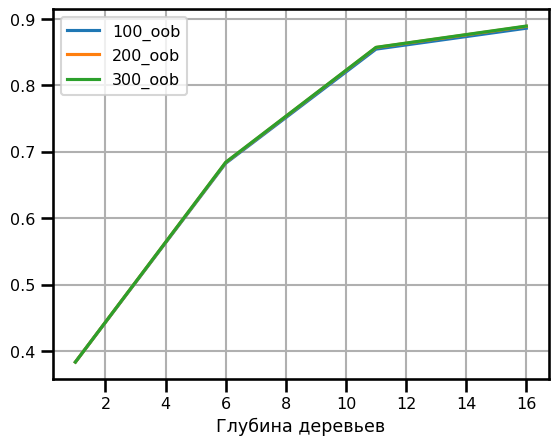

In [47]:
plt.plot(depth, rf_cv1['n=100_oob'], label='100_oob')
plt.plot(depth, rf_cv2['n=200_oob'], label='200_oob')
plt.plot(depth, rf_cv3['n=300_oob'], label='300_oob')
plt.legend()
plt.grid()
plt.xlabel('Глубина деревьев')

In [37]:

gb_1 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=11)
gb_2 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=5, random_state=11)
gb_3 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=8, random_state=11)

gb_4 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=11)
gb_5 = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=8, random_state=11)

cv_gb1_rmse, cv_gb1_r2 = cv(X, y, gb_1, 3)
cv_gb2_rmse, cv_gb2_r2 = cv(X, y, gb_2, 3)
cv_gb3_rmse, cv_gb3_r2 = cv(X, y, gb_3, 3)
cv_gb4_rmse, cv_gb4_r2 = cv(X, y, gb_4, 3)
cv_gb5_rmse, cv_gb5_r2 = cv(X, y, gb_5, 3)

100%|██████████| 3/3 [11:34<00:00, 231.66s/it]


max - -0.23337850845126126 argmax - 991
max - -0.24947215731627215 argmax - 999
max - -0.2880809570295354 argmax - 957
max - -0.2720814961862865 argmax - 999
max - -0.28846194118767715 argmax - 980


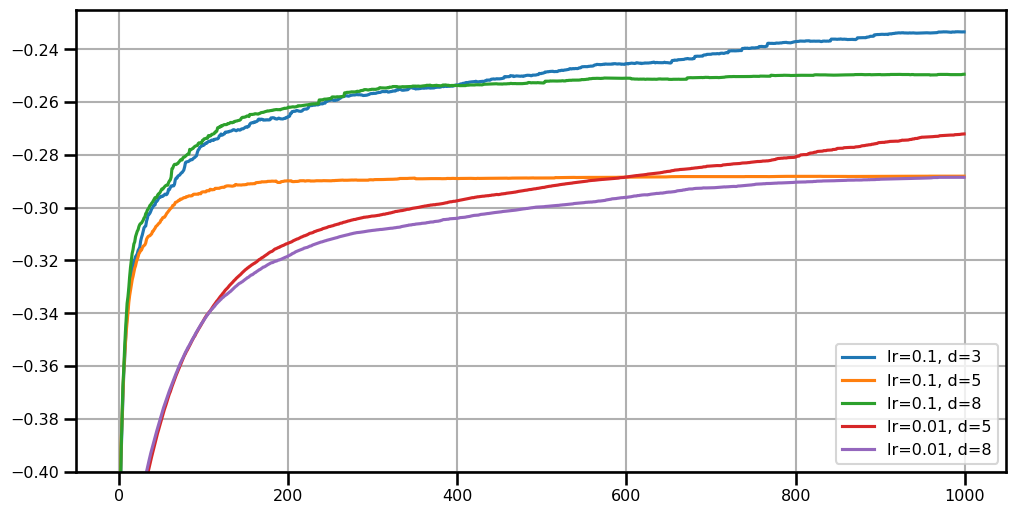

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(cv_gb1_rmse.mean(axis=0), label='lr=0.1, d=3')
plt.plot(cv_gb3_rmse.mean(axis=0), label='lr=0.1, d=5')
plt.plot(cv_gb2_rmse.mean(axis=0), label='lr=0.1, d=8')
plt.plot(cv_gb4_rmse.mean(axis=0), label='lr=0.01, d=5')
plt.plot(cv_gb5_rmse.mean(axis=0), label='lr=0.01, d=8')
plt.ylim((-0.4, -0.225))
plt.grid()
plt.legend()

print(f"max - {np.max(cv_gb1_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb1_rmse.mean(axis=0))}")
print(f"max - {np.max(cv_gb2_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb2_rmse.mean(axis=0))}")
print(f"max - {np.max(cv_gb3_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb3_rmse.mean(axis=0))}")
print(f"max - {np.max(cv_gb4_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb4_rmse.mean(axis=0))}")
print(f"max - {np.max(cv_gb5_rmse.mean(axis=0))} argmax - {np.argmax(cv_gb5_rmse.mean(axis=0))}")

r2: 0.762568337923423  
Средняя абсолютная ошибка на кросс-валидации: 0.15159482924159454  
Средняя абсолютная ошибка на тесте: 0.10922901070034423  
R² на тесте: 0.7583097230282252  

In [29]:
gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=8)
boost_scores = abs(cross_val_score(gb_model, X_train, Y_train, cv=3, scoring='neg_mean_absolute_error'))
print(f"r2: {cross_val_score(gb_model, X_train, Y_train_log, cv=3).mean()}")
print(f"Средняя абсолютная ошибка на кросс-валидации: {boost_scores.mean()}")
#Test
gb_model.fit(X_train, Y_train_log)
Y_test_log = np.log(Y_test)
Y_pred = gb_model.predict(X_test)
mae = mean_absolute_error(Y_test_log, Y_pred)
r2 = r2_score(Y_test_log, Y_pred)
print(f"Средняя абсолютная ошибка на тесте: {mae}")
print(f"R² на тесте: {r2}")

r2: 0.9120506751745233
Средняя абсолютная ошибка на кросс-валидации: 0.08835506353506668
Средняя абсолютная ошибка на тесте: 0.05692395041671398
R² на тесте: 0.9268347035670982


Лучшие параметры: {'max_depth': 6, 'learning_rate': 0.11690237714302139}  
Лучшее MAE: 0.0740

In [73]:
gb_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.11690237714302139, max_depth=6)

#Test
gb_model.fit(X_train, Y_train_log)
Y_test_log = np.log(Y_test)
Y_pred = gb_model.predict(X_test)
mae = mean_absolute_error(Y_test_log, Y_pred)
r2 = r2_score(Y_test_log, Y_pred)
print(f"Средняя абсолютная ошибка на тесте: {mae}")
print(f"R² на тесте: {r2}")

Средняя абсолютная ошибка на тесте: 0.05621768750894984
R² на тесте: 0.9316602590634446


In [48]:
rf_model = RandomForestRegressor(n_estimators=300, max_depth=12, n_jobs=-1)
boost_scores = abs(cross_val_score(rf_model, X_train, Y_train, cv=3, scoring='neg_mean_absolute_error'))
print(f"r2: {cross_val_score(rf_model, X_train, Y_train_log, cv=3).mean()}")
print(f"Средняя абсолютная ошибка на кросс-валидации: {boost_scores.mean()}")
#Test
rf_model.fit(X_train, Y_train_log)
Y_test_log = np.log(Y_test)
Y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(Y_test_log, Y_pred)
r2 = r2_score(Y_test_log, Y_pred)
print(f"Средняя абсолютная ошибка на тесте: {mae}")
print(f"R² на тесте: {r2}")

r2: 0.8630124229553434
Средняя абсолютная ошибка на кросс-валидации: 0.11071053072361658
Средняя абсолютная ошибка на тесте: 0.07466973775031333
R² на тесте: 0.8792571722647644


Ошибка чуть ниже, чем у лин. регрессии.

видим, что линейная регрессия ведет себя линейно,а градиентный бустинг способен подстраиваться и строить кусочно постоянную функцию, которая стремться занять положение в середине области данных.

In [ ]:
def bPlot(Column):
    # Подготовка данных
    new_data = pd.DataFrame()
    new_data[Column] = X_train[Column]
    new_data[target_column] = Y_train_log

    # Сортировка для корректного отображения линий
    res = new_data.sort_index().sort_values(Column, kind='mergesort')

    # Обучаем модели
    TotalVolume = res[Column].values[:, np.newaxis]
    y_ = np.array(res[target_column])
    clf.fit(TotalVolume, y_)
    gb_model.fit(TotalVolume, y_)

    # Предсказания
    res['Linear Prediction'] = clf.predict(TotalVolume)
    res['GB Prediction'] = gb_model.predict(TotalVolume)
    # Построение графика
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=res, x=Column, y=target_column, color='green', edgecolor='none', label='Данные')
    sns.lineplot(data=res, x=Column, y='Linear Prediction', color='red', label='Линейная модель')
    sns.lineplot(data=res, x=Column, y='GB Prediction', color='blue', label='GB модель')

    plt.title(f"Зависимость логарифма цены от {Column}")
    plt.xlabel(Column)
    plt.ylabel("Логарифм цены")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [31]:
sns.set_palette("Set2")
sns.set_style("whitegrid")

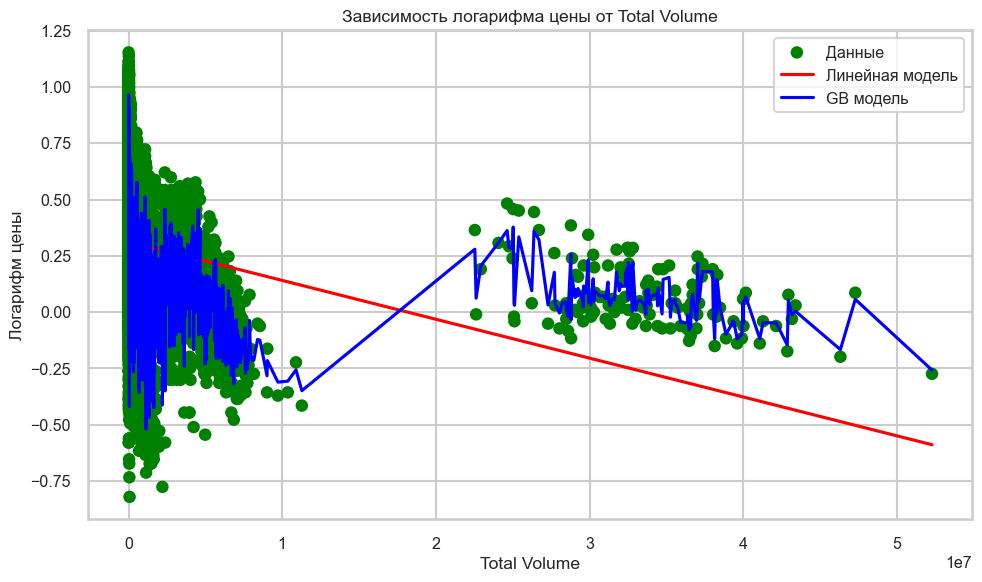

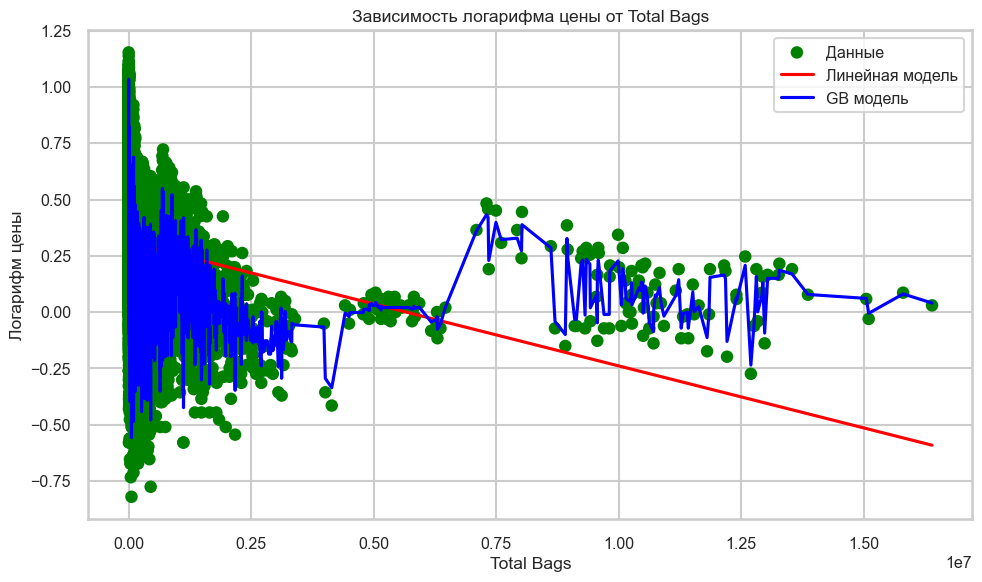

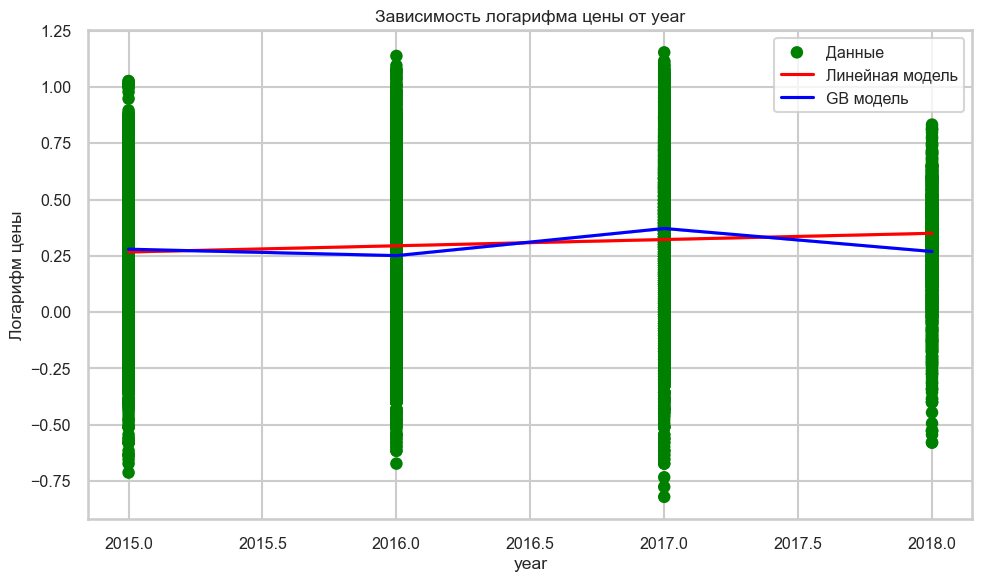

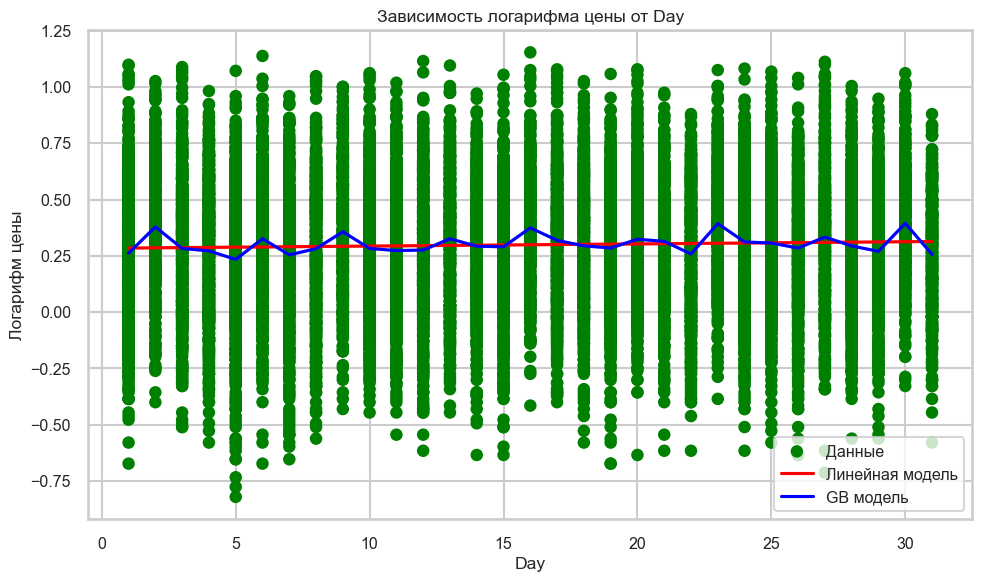

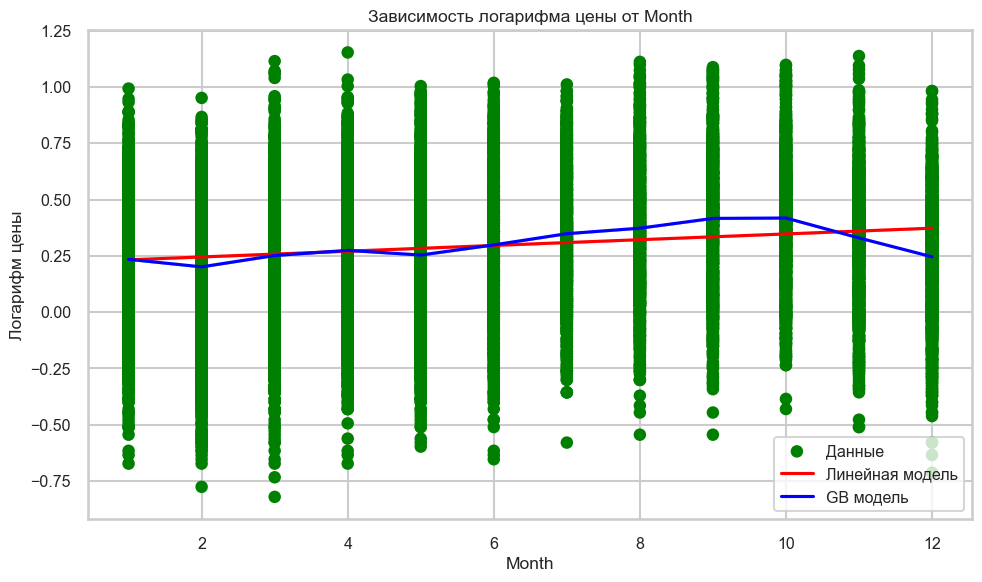

In [74]:
for col in ['Total Volume', 'Total Bags', 'year', 'Day', 'Month']:
    bPlot(col) 

Здесь наблюдается странное поведение для линейной регрессии. Видимо это связано с первоначальым трендом распределения. 

Но в то же время видно, что градиентный бустинг гораздо лучше предсказывает и способен подстраиваться под данные которые обладают нелинейными зависимостями высокого порядка.

В целом градиентный бустинг гораздо устойчивее и лучше предсказывает нелинейные зависимости. Но поскольку в наших данных наибольшей корреляцией обладал категориальный признак type, который мог принимать 2 значения, градиентный бустинг не давал весомого улучшения по сравнению с линейной регрессией.

Перейдем к предсказанию временных рядов

In [100]:
data.sort_values(by='Date')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,1,2015,46,1,4
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,1,2015,8,1,4
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,1,2015,16,1,4
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,0,2015,34,1,4
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,1,2015,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,0,2018,8,3,25
9018,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,0,2018,45,3,25
18141,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,1,2018,45,3,25
17673,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,1,2018,6,3,25


In [51]:
df = data.copy(deep = True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace = True)
df = df.resample('W').sum()
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
Date,,,,,,,,,,,,,,
2015-01-04,140.54,8.467434e+07,33098258.74,36851038.43,2278818.64,12446221.39,9910008.90,2485655.90,50556.59,54,217620,2862,108,432
2015-01-11,148.03,7.855581e+07,31024164.99,32808429.84,2349167.45,12374044.96,10352936.42,1977832.00,43276.54,54,217620,2862,108,1188
2015-01-18,150.24,7.838878e+07,31802706.86,31662041.93,2208250.55,12715784.74,10548854.11,2145586.13,21344.50,54,217620,2862,108,1944
2015-01-25,150.89,7.646628e+07,32305132.87,28929122.37,2078378.86,13153646.97,10877316.95,2252815.92,23514.10,54,217620,2862,108,2700
2015-02-01,134.68,1.194532e+08,50292988.96,50696230.48,3687489.31,14776526.50,11576833.65,3073989.39,125703.46,54,217620,2862,216,108


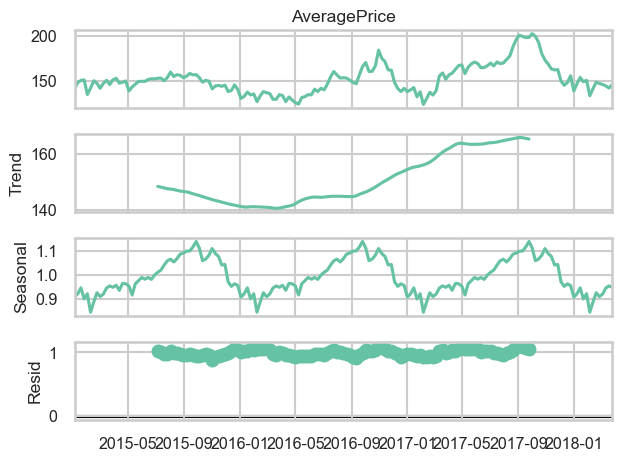

In [117]:
dec = sm.tsa.seasonal_decompose(df1['AveragePrice'], model = 'multiplicative').plot() #мультпиликативная модель, которая говорит, что компоненты перемножаются T*S*R
plt.show()

тест Дики-Фуллера

Нулевая гипотеза (H0): временной ряд нестационарен (содержит единичный корень, то есть тренд или изменяющуюся структуру).

Альтернативная гипотеза (H1): временной ряд стационарен.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def DF_test(timeseries):
    # Рассчитываем скользящее среднее и стандартное отклонение
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Рисуем график с разными стилями линий
    plt.figure(figsize=(15,5))
    plt.plot(timeseries, color='blue', label='Original', alpha=0.6)
    plt.plot(rolling_mean, color='red', linestyle='--', linewidth=2, label='Rolling Mean')
    plt.plot(rolling_std, color='black', linestyle='-.', linewidth=2, label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Тест Дики-Фуллера
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)


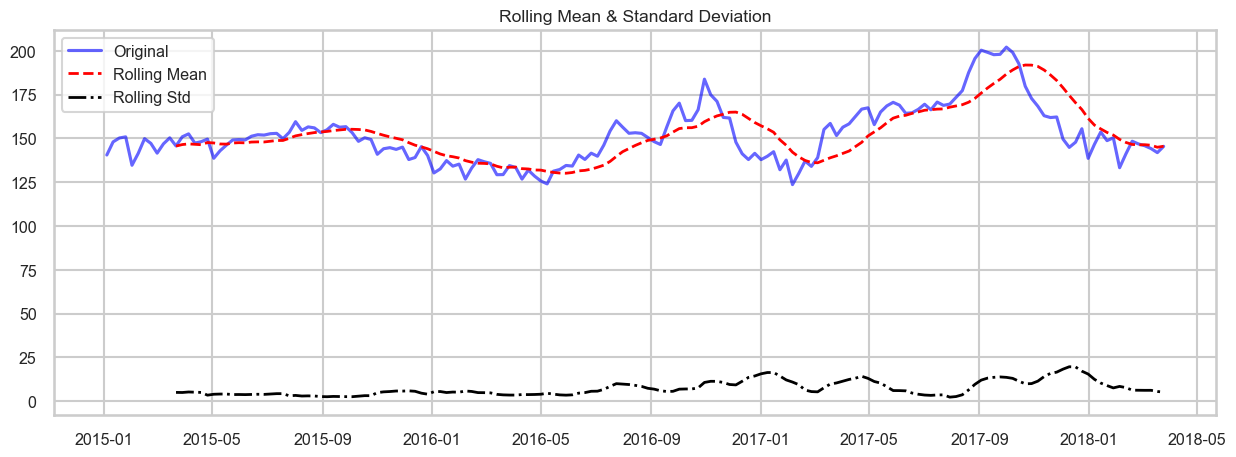

Results of Dickey-Fuller Test:
Test Statistic                  -2.363645
p-value                          0.152261
#Lags Used                       0.000000
Number of Observations Used    168.000000
Critical Value (1%)             -3.469886
Critical Value (5%)             -2.878903
Critical Value (10%)            -2.576027
dtype: float64


In [ ]:
DF_test(df['AveragePrice'])

Судя по p-val ряд скорее всего нестационарен.

Избавимся от масштабировани и тренда с помощью логарифмирования и дифференцирования 

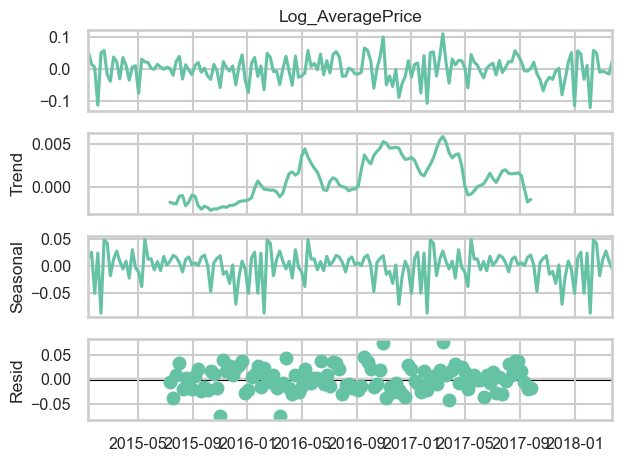

In [36]:
df['Log_AveragePrice'] = np.log(df['AveragePrice'])
df_log_diff = df['Log_AveragePrice'].diff()
df_log_diff = df_log_diff.dropna()

dec = sm.tsa.seasonal_decompose(df_log_diff,period = 52).plot()
plt.show()

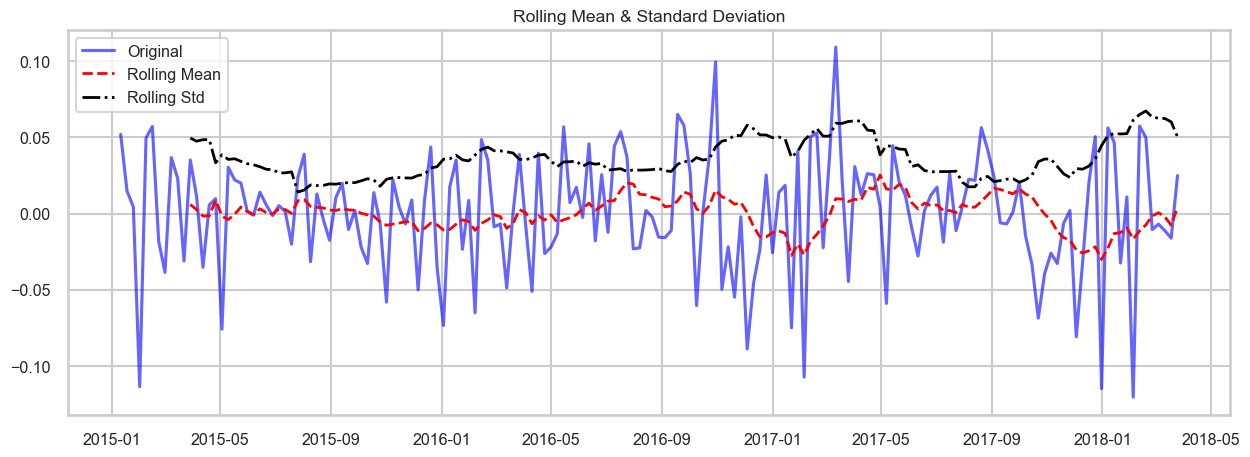

Results of Dickey-Fuller Test:
Test Statistic                -1.381774e+01
p-value                        8.010524e-26
#Lags Used                     0.000000e+00
Number of Observations Used    1.670000e+02
Critical Value (1%)           -3.470126e+00
Critical Value (5%)           -2.879008e+00
Critical Value (10%)          -2.576083e+00
dtype: float64


In [ ]:
DF_test(df_log_diff)

p-val < 0.05 -> ряд стационарен

ARIMA

AR (AutoRegressive) — авторегрессия:

Модель объясняет текущее значение ряда через его собственные предыдущие значения (лаговые значения).
Параметр 
𝑝 — число лагов в авторегрессии.

I (Integrated) — интегрирование:

Для того чтобы сделать ряд стационарным, применяют дифференцирование.
Параметр 
𝑑 — порядок дифференцирования.

MA (Moving Average) — скользящее среднее:

Ошибка текущего значения объясняется с помощью предыдущих ошибок модели.
Параметр 
𝑞 — порядок скользящего среднего.

In [166]:
model = ARIMA(df_log_diff, order=(1,1,2)) #p,d,q
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       Log_AveragePrice   No. Observations:                  168
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 302.229
Date:                Sat, 17 May 2025   AIC                           -596.458
Time:                        17:05:42   BIC                           -583.986
Sample:                    01-11-2015   HQIC                          -591.396
                         - 03-25-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000     44.174     -0.023      0.982     -87.580      85.580
ma.L1      -1.232e-05     55.228  -2.23e-07      1.000    -108.244     108.244
ma.L2         -1.0000     55.228     -0.018      0.9

c:\Users\user\.conda\envs\nlp\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [187]:
len(train)

119

	ARIMA MODEL: Walk-Forward Validation



c:\Users\user\.conda\envs\nlp\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\user\.conda\envs\nlp\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\user\.conda\envs\nlp\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


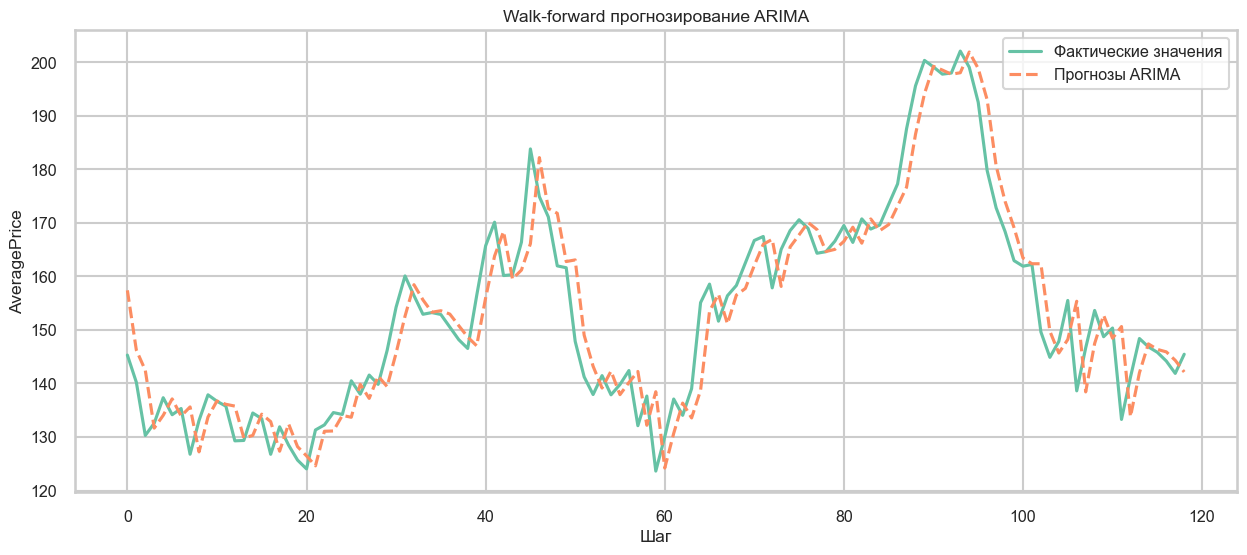

In [185]:
s = 50
train, test = df['Log_AveragePrice'][:-50], df['Log_AveragePrice'][50:]

print('\tARIMA MODEL: Walk-Forward Validation\n')

history = list(train)
predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,2))
    model_fit = model.fit()
    
    # Одношаговый прогноз
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    
    # Добавляем реальное наблюдение в историю
    obs = test.iloc[t]
    history.append(obs)

# Преобразуем прогнозы из логарифмов в исходный масштаб
predictions_exp = np.exp(predictions)
test_exp = np.exp(test)

# Визуализация
plt.figure(figsize=(15,6))
plt.plot(test_exp.values, label='Фактические значения')
plt.plot(predictions_exp, label='Прогнозы ARIMA', linestyle='--')
plt.title('Walk-forward прогнозирование ARIMA')
plt.xlabel('Шаг')
plt.ylabel('AveragePrice')
plt.legend()
plt.show()

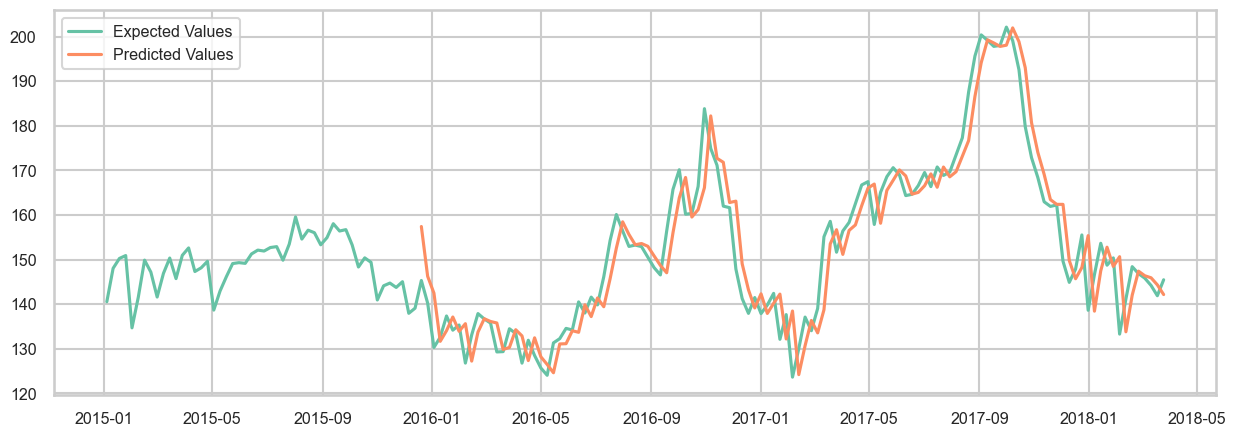

In [188]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(df['AveragePrice'],label = 'Expected Values')
plt.plot(np.exp(predictions_series),label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [189]:
error = np.sqrt(mean_absolute_error(np.exp(test),np.exp(predictions)))
print('Test MAE: %.4f' % error)
predictions_series = pd.Series(np.exp(predictions), index = test.index)

Test MAE: 2.2298


Прогноз на будущее

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor

# --- Создаем признаки ---
def create_features(df, target_col='AveragePrice', lags=[1,7,14], windows=[7,14]):
    df_feat = df.copy()
    
    for lag in lags:
        df_feat[f'lag_{lag}'] = df_feat[target_col].shift(lag)
        
    for w in windows:
        df_feat[f'roll_mean_{w}'] = df_feat[target_col].shift(1).rolling(window=w).mean()
        df_feat[f'roll_std_{w}'] = df_feat[target_col].shift(1).rolling(window=w).std()
    
    df_feat = df_feat.dropna()
    return df_feat

# --- Подготовка данных ---
df_feat = create_features(df, target_col='AveragePrice')

X = df_feat.drop(columns=['AveragePrice'])
y = df_feat['AveragePrice']

# Делим на train и test
split = -70
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

# --- Обучение CatBoost ---
model = CatBoostRegressor(iterations=1000, learning_rate=0.05, depth=6, verbose=100)
model.fit(X_train, y_train)

# --- Прогноз ---
preds = model.predict(X_test)


0:	learn: 11.6568458	total: 118ms	remaining: 1m 58s
100:	learn: 2.3585020	total: 404ms	remaining: 3.6s
200:	learn: 1.0434438	total: 689ms	remaining: 2.74s
300:	learn: 0.4643169	total: 993ms	remaining: 2.31s
400:	learn: 0.2477165	total: 1.19s	remaining: 1.77s
500:	learn: 0.1271570	total: 1.39s	remaining: 1.38s
600:	learn: 0.0653376	total: 1.89s	remaining: 1.26s
700:	learn: 0.0329674	total: 2.12s	remaining: 903ms
800:	learn: 0.0187809	total: 2.4s	remaining: 596ms
900:	learn: 0.0107709	total: 2.78s	remaining: 305ms
999:	learn: 0.0061903	total: 3.11s	remaining: 0us


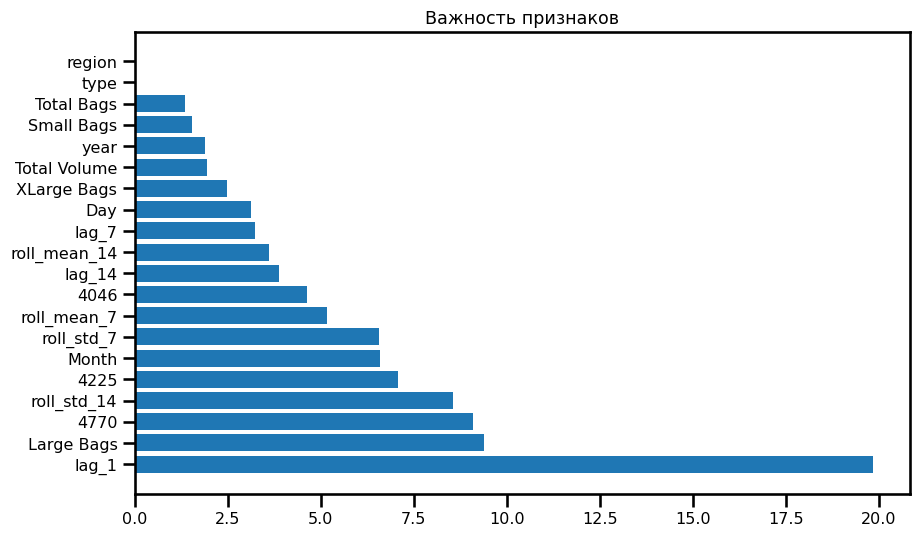

In [53]:
# --- Важность признаков ---
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.get_feature_importance()
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.title('Важность признаков')
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error
import optuna

# --- Оптимизация гиперпараметров с Optuna ---
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 500, 1500),
        'depth': trial.suggest_int('depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-3, 10, log=True),
        'random_strength': trial.suggest_float('random_strength', 1e-3, 10),
        'verbose': False
    }
    
    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50)
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    return rmse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

print(f"Лучшие параметры: {study.best_params}")
print(f"Лучшее RMSE: {study.best_value:.4f}")

d:\code\mlhw\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-05-22 08:09:16,743] A new study created in memory with name: no-name-18ef2ef6-7f2f-4b71-a9ad-f7a3b10f9b4c
[I 2025-05-22 08:09:17,208] Trial 0 finished with value: 14.889348702441026 and parameters: {'iterations': 1088, 'depth': 6, 'learning_rate': 0.08974083879233175, 'l2_leaf_reg': 0.20855996104923286, 'random_strength': 9.791971502231837}. Best is trial 0 with value: 14.889348702441026.
[I 2025-05-22 08:09:18,626] Trial 1 finished with value: 13.182300821139764 and parameters: {'iterations': 595, 'depth': 5, 'learning_rate': 0.04988197329124165, 'l2_leaf_reg': 0.9526493090715223, 'random_strength': 9.637094657128172}. Best is trial 1 with value: 13.182300821139764.
[I 2025-05-22 08:09:21,397] Trial 2 finished with value: 16.10128736347282

Лучшие параметры: {'iterations': 1384, 'depth': 3, 'learning_rate': 0.02254510639784639, 'l2_leaf_reg': 9.726994125206593, 'random_strength': 3.260621003559439}
Лучшее RMSE: 10.5318


In [44]:
gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=8)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

0:	learn: 11.8782975	total: 1.24ms	remaining: 1.72s
100:	learn: 5.8662797	total: 205ms	remaining: 2.6s
200:	learn: 3.9476431	total: 522ms	remaining: 3.07s
300:	learn: 3.2050427	total: 631ms	remaining: 2.27s
400:	learn: 2.5402880	total: 753ms	remaining: 1.84s
500:	learn: 2.1846468	total: 856ms	remaining: 1.51s
600:	learn: 1.8568732	total: 959ms	remaining: 1.25s
700:	learn: 1.6361136	total: 1.06s	remaining: 1.03s
800:	learn: 1.4254376	total: 1.17s	remaining: 850ms
900:	learn: 1.1944024	total: 1.27s	remaining: 681ms
1000:	learn: 1.0742545	total: 1.37s	remaining: 524ms
1100:	learn: 0.8852088	total: 1.47s	remaining: 379ms
1200:	learn: 0.7482196	total: 1.58s	remaining: 241ms
1300:	learn: 0.6467471	total: 1.68s	remaining: 107ms
1383:	learn: 0.5747591	total: 1.75s	remaining: 0us


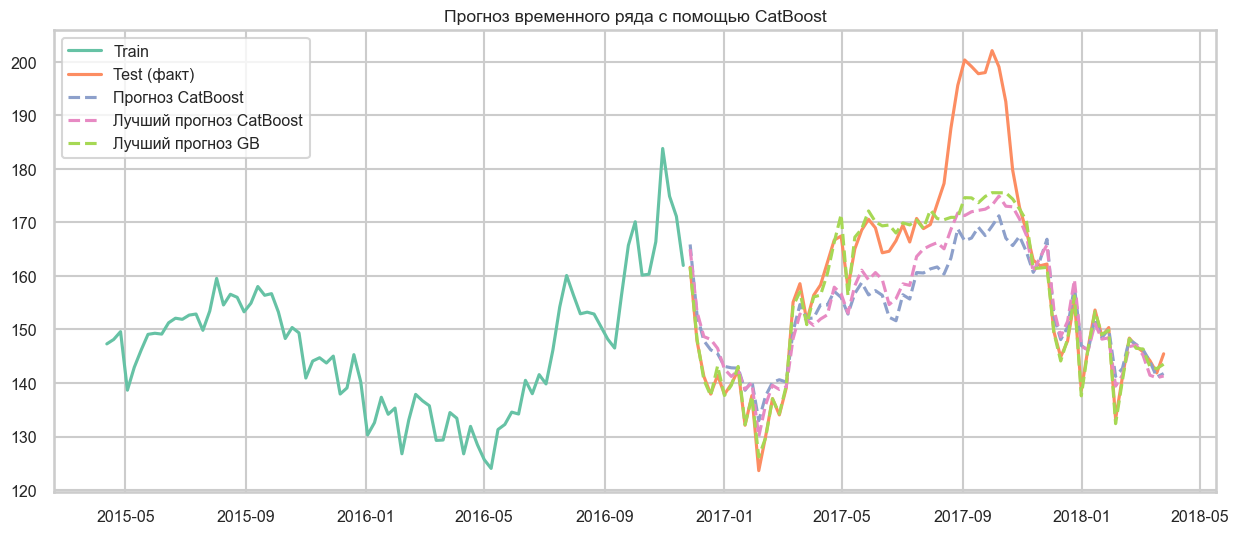

In [45]:
# --- Обучение CatBoost ---
model = CatBoostRegressor(**study.best_params, verbose=100)
model.fit(X_train, y_train)

# --- Прогноз ---
best_preds = model.predict(X_test)

# --- Визуализация ---
plt.figure(figsize=(15,6))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test (факт)')
plt.plot(y_test.index, preds, label='Прогноз CatBoost', linestyle='--')
plt.plot(y_test.index, best_preds, label='Лучший прогноз CatBoost', linestyle='--')
plt.plot(y_test.index, gb_preds, label='Лучший прогноз GB', linestyle='--')
plt.legend()
plt.title('Прогноз временного ряда с помощью CatBoost')
plt.show()